**Михович Анастасия, МОиАД, НИУ ВШЭ СПб**

**Вариант 31**

**Подготовка**

Сначала отобразим график по текущим данным

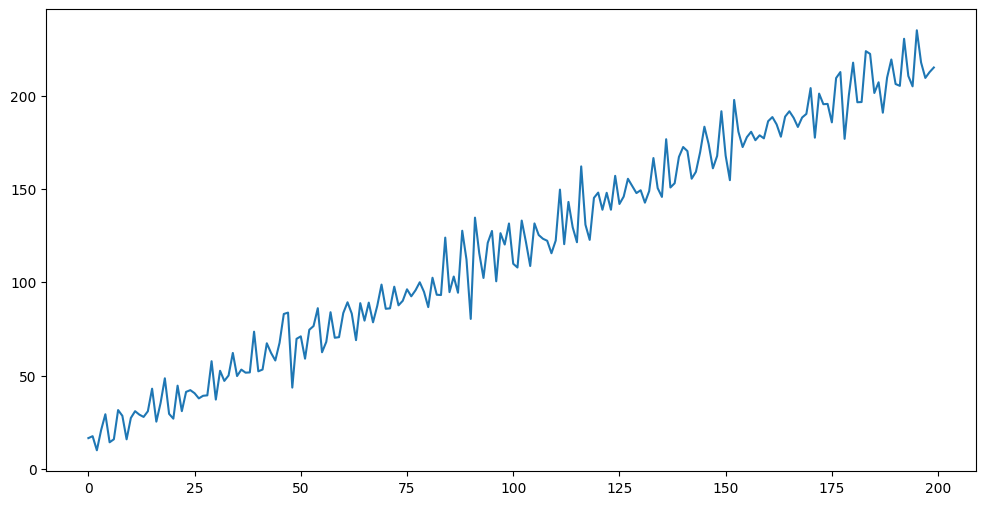

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

data = [16.5333,17.5667,10.0206,20.8220,29.3182,14.3034,15.9092,31.5575,28.4844,15.8817,27.3331,30.9570,29.1082,27.8850,30.9057,42.9995,25.3456,35.3936,48.5639,29.5226,26.9517,44.6242,30.9763,41.2980,42.2235,40.5795,37.8091,39.2070,39.4356,57.7196,37.1822,52.5951,47.1760,50.0829,62.1577,49.7743,53.2290,51.5808,51.7241,73.5335,52.3050,53.2711,67.3226,62.1624,58.1113,67.5822,83.0169,83.7519,43.5932,69.7128,71.0315,59.0958,74.5504,76.5500,86.1094,62.5212,68.0902,83.9508,70.2841,70.6003,83.5294,89.2890,83.2002,69.0056,88.8293,79.4514,89.1056,78.5510,87.4028,98.7594,85.8055,86.0256,97.6384,87.6483,90.0900,96.2270,92.4891,95.6940,100.0055,94.8655,86.6849,102.4316,93.3196,93.1662,123.9149,94.7087,103.0738,94.4071,127.5966,112.1691,80.3721,134.6139,115.6589,102.3160,121.0998,127.4812,100.5204,126.3036,120.2110,131.4740,109.9113,107.9077,133.0403,121.4735,108.7230,131.5225,125.2941,123.3015,122.2299,115.5455,122.3482,149.6214,120.4094,143.0295,129.4336,121.4490,162.0595,130.8190,122.6960,145.2035,148.0301,138.8342,147.9260,138.8401,156.9984,141.9290,145.8790,155.4253,151.5762,147.7687,149.2850,142.6398,148.8060,166.5235,150.4236,145.7171,176.6098,150.7595,153.0381,167.1171,172.4367,170.2581,155.4607,159.1564,169.7310,183.3120,173.9938,161.0395,167.6721,191.5922,167.8104,154.6793,197.6511,180.6535,172.4249,177.7282,180.5955,176.0845,178.6990,177.0802,186.2548,188.4854,184.5446,177.9593,188.7148,191.5737,188.1110,183.1814,188.2420,190.1789,203.9870,177.4385,201.0481,195.3678,195.5270,185.6488,209.3572,212.5839,176.8143,200.1514,217.6162,196.4114,196.5292,223.7685,222.3185,201.3754,207.1089,190.8198,209.6016,219.3221,206.1795,205.2000,230.4064,210.4762,204.9322,234.9594,217.7133,209.4371,212.5570,215.0236]
plt.figure(figsize=(12, 6))
plt.plot(data)
plt.show()

Как мы видим на графике, ряд не выглядит стационарным, так как имеет тренд и вариабельность.

**Задание 1**

Используем процедуру Доладо-Дженкинса-Сосвилла-Риверо (DDSR) и проверим ряд на принадлежность к типу DSP.

Шаг 1.
Пусть $X_t = \mu +bt +α_1X_{t−1} +ε_t$,

 $ε_t$ ∼ $WN(0,σ^2)$.

Основная гипотеза $H_0$: $α = 1$. Альтернативная гипотеза $H_A$:$α < 1$

Проверим гипотезу и исходный ряд на стационарность с помощью расширенного теста Дики-Фуллера - ADF (он используется для проверки наличия единичных корней во временном ряде, что является признаком нестационарности.) Уровень значимости выберем стандартно: 0.05.



In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data, regression='ct')
print('ADF Statistic:', result[0])
print('Critical Values:', result[4])

ADF Statistic: -18.579757978214246
Critical Values: {'1%': -4.005235140049614, '5%': -3.4329000694219, '10%': -3.1402115863254525}


Здесь показаны следующие данные: показатель ADF статистики, а также несколько значений для критических интервалов (для удобства, чтобы каждый раз не искать таблицу). Поскольку уровень значимости был выбран 0.05 нас интересует число на 5%: -3.433

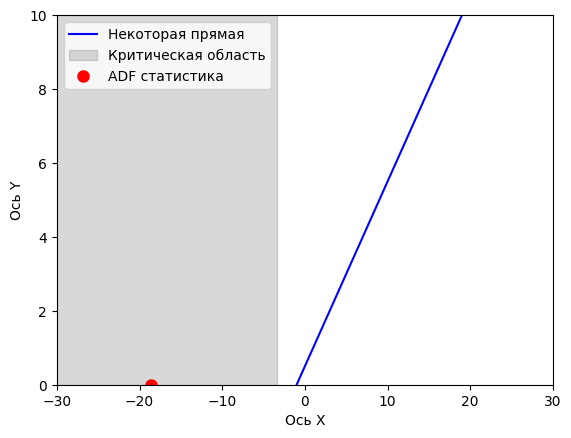

In [ ]:
import numpy as np
# Задаем координаты точек прямой
y = np.linspace(0, 10, 100)
x = 2 * y - 1

# Создаем график
plt.plot(x, y, 'b-', label='Некоторая прямая')

# Рисуем критическую область
plt.fill_betweenx(y, -100, -3.433, color='gray', alpha=0.3, label='Критическая область')

# Рисуем точку со значением ADF статистики
plt.plot(-18.579, 0, 'ro', markersize=8, label='ADF статистика')

# Настраиваем отображение осей
plt.ylim([0, 10])
plt.xlim([-30, 30])
plt.ylabel('Ось Y')
plt.xlabel('Ось X')

# Добавляем легенду
plt.legend()

# Отображаем график
plt.show()

На графике видно, что ADF статистика (-18.579) меньше критического значения для уроня значимости 5% (даже меньше, чем на 1%). -18.579 < -3.433. Значит мы попадаем в критическую область.

Это означает, что мы можем **отвергнуть нулевую гипотезу H0**. Следовательно можно сделать выывод, что ряд содержит **тренд + стационарную случайную составляющую и не принадлежит типу DSP**.

Следовательно, чтобы понять, какой моделью можно описать данный ряд, надо убрать тренд из данных

**Задание 2**

Детерминированная составляющая - это тренд и сезонность ряда, которые могут влиять на стационарность и прогнозирование ряда. 

В нашем случае сезонности у данных нет.

Для оценки детерминированной составляющей ряда необходимо выделить тренд, который будет описывать основное направление изменения значений ряда. Для этого воспользуемся методом наименьших квадратов (МНК), который позволяет аппроксимировать тренд линейной моделью.

Для оценки детерминированной составляющей ряда по методу наименьших квадратов (МНК) необходимо сначала построить модель линейной регрессии.


Для временного ряда мы можем считать, что зависимая переменная y - это значение ряда в момент времени t, а независимая переменная x - это время t.

Таким образом, для временного ряда мы можем записать модель линейной регрессии следующим образом:

$$𝑦_𝑡 = a + b_𝑡x + 𝜀_𝑡$$

где $𝑦_𝑡$ - значение ряда в момент времени $t$, $b_𝑡$ - трендовая составляющая ряда в момент времени $t$, $𝜀_𝑡$ - случайная ошибка в момент времени t.

Метод наименьших квадратов заключается в поиске таких значений коэффициентов a и b, которые минимизируют сумму квадратов отклонений модели от фактических значений ряда:

$$min Σ(𝑦_𝑡−(a+b_𝑡))^2$$

Для решения этой задачи мы можем использовать формулы МНК:

$$b = \frac{Σ(𝑦_𝑡 − 𝑦̄)(𝑡_𝑡 − 𝑡̄)} {Σ(𝑡_𝑡 − 𝑡̄)^2}$$

$$𝛼̂ = 𝑦̄ − b𝑡̄$$

где $𝑦̄$ - среднее значение ряда, $𝑡̄$ - среднее значение временных индексов.

Используя эти формулы, мы можем оценить коэффициенты a и b для нашего временного ряда. Полученные коэффициенты a и b являются оценками для константы и углового коэффициента линейного тренда. Посчитаем их и отобразим график:

Коэффициенты a = 1.0335261771544288, b = 16.574898373134335


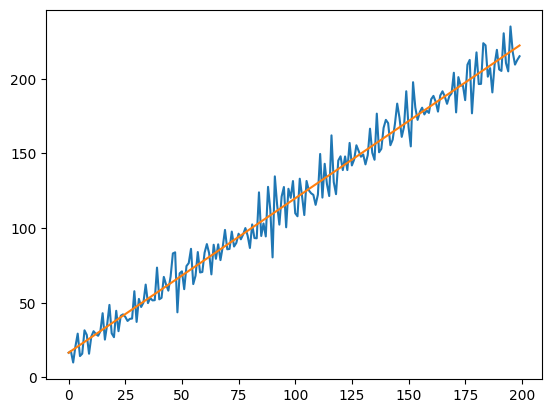

In [ ]:
# создаем массив временных индексов
t = np.arange(len(data))

# оцениваем коэффициенты a и b
a, b = np.polyfit(t, data, 1)
print(f'Коэффициенты a = {a}, b = {b}')

# получаем детерминированную составляющую ряда
trend = a * t + b
# Отображаем на них графики ряда и тренда
fig, ax = plt.subplots()
ax.plot(data)
ax.plot(trend)

# Отображаем рисунок
plt.show()

Первый коэффициент a, также известный как угловой коэффициент, показывает, как быстро изменяется ряд со временем. В данном случае коэффициент a равен 1.0335, что говорит о положительном тренде в ряде.

Второй коэффициент b, также известный как константа, показывает, какое значение ряда мы ожидаем в начале временного периода (в момент времени t = 0). В данном случае коэффициент b равен 16.5749, что означает, что в начале временного периода (t=0) мы ожидаем значение ряда, равное 16.5749.

Таким образом, на основе коэффициентов линейной регрессии можно сделать вывод, что **ряд имеет положительный тренд** и в начале временного периода значения ряда составляли около 16.57.

**Задание 3**

Детрендирование ряда позволяет избавиться от тренда и сезонности, чтобы получить стационарный ряд, на котором проще проводить анализ и строить прогнозы.

Чтобы детрендировать ряд, просто вычтем тренд из ряда и отобразим этот график:

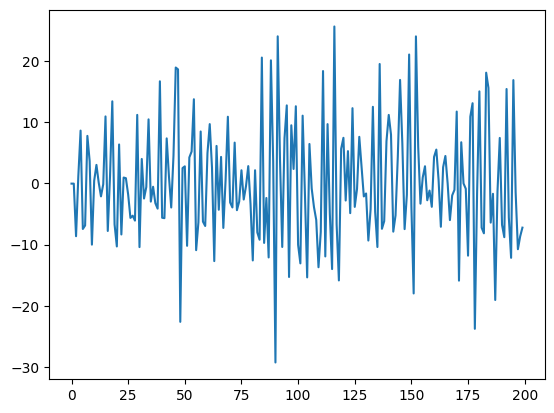

In [ ]:
# Вычисляем детрендированную составляющую
detrended_data = data - trend
plt.plot(detrended_data)
plt.show()

Трудно сказать на первый взгляд, что это за модель. Но, поскольку мы видим, что детрендированный ряд стационарный, можем построить графики выборочных автокорреляционной функции и частной автокорреляционной функции.

ACF показывает корреляцию между значениями ряда в разных точках времени, с учетом всех других значениях ряда между ними. PACF, в свою очередь, показывает корреляцию между значениями ряда только на определенном временном расстоянии, с учетом всех других значений ряда между ними. На графике ACF мы можем увидеть, на каких лагах времени есть значимая автокорреляция. Если на графике ACF есть значимые пики на определенных лагах, это может указывать на наличие сезонности или цикличности в ряде.

На графике PACF мы можем увидеть, на каких лагах времени есть значимая частная автокорреляция. Если на графике PACF есть значимые пики на определенных лагах, это может указывать на наличие определенной структуры в ряде, например, на наличие авторегрессионной (AR) или скользящей средней (MA) компоненты.

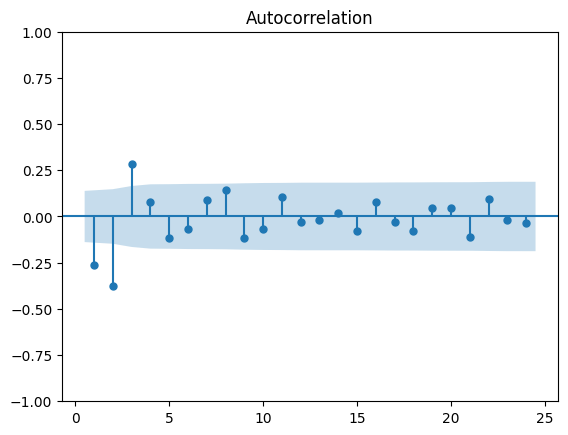

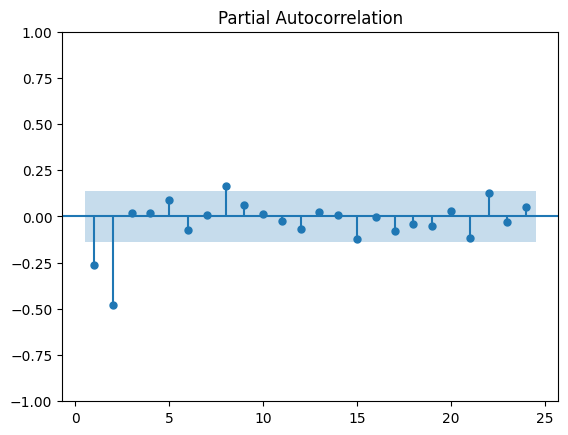

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

lags = range(1, 25)
plot_acf(detrended_data, lags=lags)
plt.show()
plot_pacf(detrended_data, lags=lags)
plt.show()

На графиках синим показан интервал, которой считается $$\pm \frac{1.96}{\sqrt(N)}$$ где N - число наблюдей (у нас 200).

Мы видим, что графике автокорреляции выбиваются первые 3 значения, а в частной автокорреляции первые 2, следовательно, выбирая то, что "проще", мы можем пока предположить, что данные можно описать **либо Автороегрессионной моделью 2-го порядка либо Скользящей стредней 2-го порядка**, то есть комбинированныя модель

**Задания 4-5**

Для идентификации случайной составляющей ряда я выбрала модели **MA и AR с дальнейшим подбором параметра, который указывает на порядок**.

Подбор лучших параметров для модели временного ряда позволяет улучшить качество прогнозирования и снизить ошибки модели. Оптимальные параметры позволяют учесть все особенности временного ряда и предсказать его будущие значения с наилучшей точностью. 

Определяем параметры модели MA.

Поскольку в Питоне ARMA, MA и AR можно задать через ARIMA, просто с 0 на местах соответствующими коэффициентами (например, d = 0 для ARMA и т.д.) я буду подбирать параметры сразу для трех моделей (ARMA, MA и AR)

In [ ]:
import itertools
import warnings
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np

# Создание списка параметров p, d и q для модели ARIMA
p = range(0, 4)
d = range(0, 3)
q = range(0, 4)
pdq = list(itertools.product(p, d, q))

# Использование критерия Акаике (AIC) для оценки качества модели
best_aic = np.inf
best_pdq = None
warnings.filterwarnings("ignore") # отключение предупреждений
for param in pdq:
    try:
        mod = ARIMA(detrended_data, order=param)
        results = mod.fit()
        aic = results.aic
        if aic < best_aic:
            best_aic = aic
            best_pdq = param
    except:
        continue

# Вывод лучших параметров для модели ARIMA
print(f"Best ARIMA{best_pdq}")

Best ARIMA(2, 0, 0)


Наилучший результат у  **ARIMA(2, 0, 0)**, что соответствует модели **AR(2)**

Расчитаем критерии Акаике и Шварца еще и для них, чтобы проверить AR(2) и МА(2)

**Задание 6**

Посчитаем критерии Акаике и Шварца на выбранных моделях с лучшими параметрами.

Расчет критериев AIC и BIC необходим, чтобы выбрать лучшую модель для временного ряда на основе их точности и сложности. Оба критерия позволяют учесть баланс между точностью модели и ее сложностью, чтобы избежать переобучения (Чем меньше значение критерия, тем лучше модель подходит для описания данных.).

Известно, что они считаются следующим образом:

$$AIC = n\ln(\frac{RSS}{n}) + 2k$$

$$BIC = n\ln(\frac{RSS}{n}) + k\ln(n)$$

где $n$ - число наблюдений, $RSS$ - сумма квадратов остатков (residual sum of squares), $k$ - количество параметров в модели.

Сначала посчитаем критерии для модели MA(2):

In [ ]:
# Обучаем модель MA(3) на детрендированных данных
ma_model = ARIMA(detrended_data, order=(0, 0, 3)).fit()

# Вычисляем критерии Акаике и Шварца
ma_aic = ma_model.aic
ma_bic = ma_model.bic

print('MA(2) AIC:', ma_aic)
print('MA(2) BIC:', ma_bic)

MA(2) AIC: 1417.249229150501
MA(2) BIC: 1433.7408159832412


Для модели AR(2)

In [ ]:
# Обучаем модель MA(3) на детрендированных данных
ma_model = ARIMA(detrended_data, order=(2, 0, 0)).fit()

# Вычисляем критерии Акаике и Шварца
ma_aic = ma_model.aic
ma_bic = ma_model.bic

print('AR(2) AIC:', ma_aic)
print('AR(2) BIC:', ma_bic)

AR(2) AIC: 1413.7738259525877
AR(2) BIC: 1426.9670954187798


В нашем случае, AR(2) имеет меньшее значение AIC и BIC, чем MA(2), поэтому можно сделать вывод, что модель AR(2) лучше подходит для описания наших данных.

 Таким образом, на основе информационных критериев, мы можем **выбрать модель AR(2) как более адекватную**.

Для дополнительной проверки адекватности модели необходимо провести анализ остатков, являются ли они белым шумом.

Например, если остатки модели AR(2) будут показывать наличие автокорреляции (т.е. наличие корреляции между значениями остатков на разных лагах), то это может быть признаком того, что в модели остались некоторые систематические закономерности, которые её не учитывает. Это может привести к неадекватным прогнозам на будущее.

То есть, в результате диагностики можно убедиться, что остатки не содержат никакой дополнительной информации, которую модель не учитывает, и что модель является адекватной для описания временного ряда.

**Задание 7**

Для проведения диагностики остатков, можно попробовать несколько способов, чтобы убедиться в адекватности модели. 
выведем график остатков:

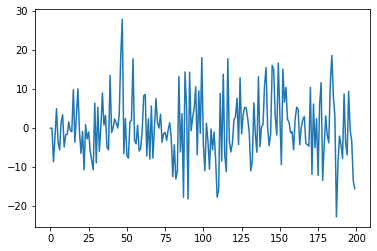

In [ ]:
# создание модели AR(3)
model = ARIMA(detrended_data, order=(3, 0, 0))
model_fit = model.fit()
residuals = model_fit.resid

plt.plot(residuals)
plt.show()

Видим, что график отстатков визуально не имеет тренда и сезонности, что хороший знак. Можем начать проверку остатков через тесты.

Выведем коррелограмму остатков: plot_acf(residuals) и частичная коррелограмма остатков: plot_pacf(residual), чтобы визуально оценить их зависимость:

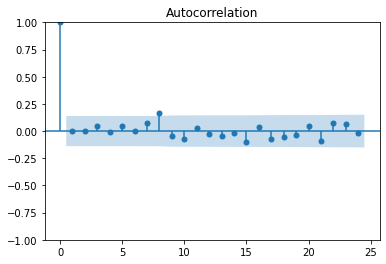

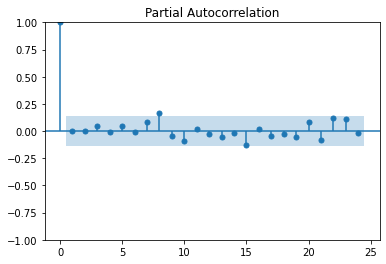

In [ ]:
plot_acf(residuals)
plt.show()
plot_pacf(residuals)
plt.show()

Ничего особо "криминального" не видно, разве что одно значение (7) слегка выбивается из интервала (0.22). Сделаем соответствующие тесты на то, что количество таких "выбивающихся из интервала" значений не превышало допустимые нормы. 

Возьмем уровень значимости $α = 0.05$ для дальнейших проверок

1. Статистика Льюнга-Бокса. Она определяется следующим образом: $$Q(m) = n(n+2) * sum(r_k^2/(n-k))$$

где n - общее количество наблюдений, r_k - автокорреляционная функция (ACF) для лага k, а m - количество лагов, которые нужно проверить на автокорреляцию. Статистика $Q(m)$ имеет распределение Хи-квадрат с m степенями свободы при условии, что остатки независимы и нормально распределены.

В случае теста Льюнга-Бокса гипотезы формулируем следующим образом:

H0: Нет автокорреляции в остатках модели.

H1: Есть автокорреляция в остатках модели.

Уровень значимости оставим 0.05

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

a = acorr_ljungbox(residuals, lags = 1)
print(a)

    lb_stat  lb_pvalue
1  0.000846    0.97679


В данном случае, так как значение p-value больше, чем обычный уровень значимости 0.05 (0.97 > 0.05)

Мы не можем отвергнуть нулевую гипотезу и делаем вывод, что остатки не имеют статистически значимой автокорреляции в данных лагах.

Выведем Коррелограмма остатков: plot_acf(residuals) и частичная коррелограмма остатков: plot_pacf(residual).

Проверим еще на всякий случай, имеют ли остатки регрессионной модели нормальное распределение.

В этом может помочь тест Шапиро-Уилка. 

Статистика теста Шапиро-Уилка определяется следующим образом:

$$W = \frac{(\sum_{i=1}^{n} a_i x_{(i)})^2}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$$

где n - количество наблюдений в выборке, $x_i$ - i-е наблюдение, $x_{(i)}$ - i-е порядковое статистическое значение в выборке, $\bar{x}$ - среднее значение выборки, $a_i$ - коэффициенты, зависящие от среднего значения, дисперсии и ковариации выборки.

В случае теста Шапиро-Уилка гипотезы формулируем гипотезы следующим образом:

H0: выборка данных имеет нормальное распределение.

H1: выборка данных не имеет нормального распределения.

In [ ]:
from scipy.stats import shapiro

stat, p_value = shapiro(residuals)
print(f'stat = {stat}, p_value = {p_value}')

stat = 0.9871960878372192, p_value = 0.06823276728391647


stat равен 0.987 - непосредственно сама статистика теста Шапиро-Уилка. Значение статистики должно находиться между 0 и 1, где 0 указывает на наибольшее отклонение от нормального распределения, а 1 указывает на наилучшее соответствие.

В нашем случае 0.987 достаточно близко к 1, что говорит о приближенности модели к нормальному распределению

p_value = 0.0682, что больше определенного ранее уровня значимости 0.05, поэтому нулевая гипотеза не отвергается и можно считать, что выборка данных имеет признаки нормального распределения.

Таким образом, мы убедились, что остатки не содержат никакой дополнительной информации, которую модель не учитывает, и что модель является адекватной для описания временного ряда.

Следовательно, можем перейти к предсказанию.

**Задание 8**

Построим прогноз для ряда (модель AR(2)).

На компьютерном уровне для построения прогноза на основе модели AR(2) нужно использовать уже обученную модель и передать ей последние наблюдения временного ряда для получения прогноза на следующий период.

На математическом:

Известно, что модель AR(2) описывается следующим уравнением:

$$y_t = \alpha_1y_{t-1} + \alpha_2y_{t-2} + e_t$$

где $y_t$ - значение временного ряда в момент времени $t$, $\alpha_1$ и $\alpha_2 $ - коэффициенты авторегрессии порядка 1 и 2 соответственно, $y_{t-1} $ и $y_{t-2}$ - значения временного ряда на предыдущих шагах, $e_t$ - ошибка модели.

Для получения прогноза на следующий период $(t+1)$ нужно подставить последние наблюдения временного ряда $(y_t, y_{t-1})$ в уравнение AR(2) и рассчитать значение $y_{t+1}$. То есть:

$\hat{y}_{t+1} = \alpha_1*y_{t} + \alpha_2*y_{t-1}$

Значение $\hat{y}_{t+1}$ будет предсказанием следующего значения временного ряда.

In [ ]:
model_arima = ARIMA(detrended_data, order=(2, 0, 0))
model_fit_arima = model_arima.fit()
forecast_arima = model_fit_arima.forecast(steps=1)

model_arima_orig = ARIMA(data, order=(2, 0, 0))
model_fit_arima_orig = model_arima_orig.fit()
forecast_arima_orig = model_fit_arima_orig.forecast(steps=1)

Спрогнозированное значение

In [ ]:
forecast_arima_list = forecast_arima.tolist()
print(f"Для детрендированного ряда: {forecast_arima_list}")

forecast_arima_orig_list = forecast_arima_orig.tolist()
print(f"Для оригинального ряда: {forecast_arima_orig_list}")

Для детрендированного ряда: [6.9675236362021735]
Для оригинального ряда: [212.9192323587587]


Выведем последние 51 значение детрендированного ряда (включая 1 предсказанное) и оригинального:

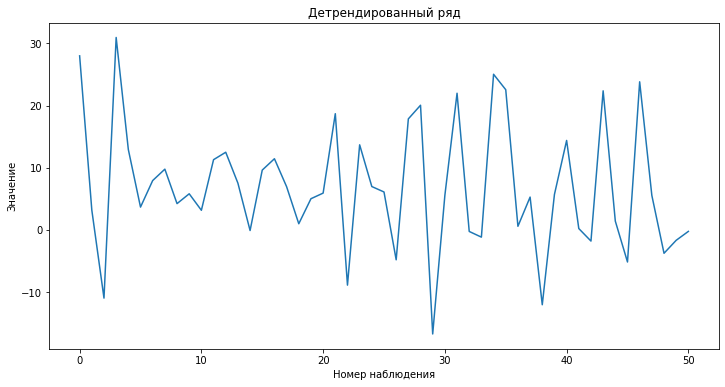

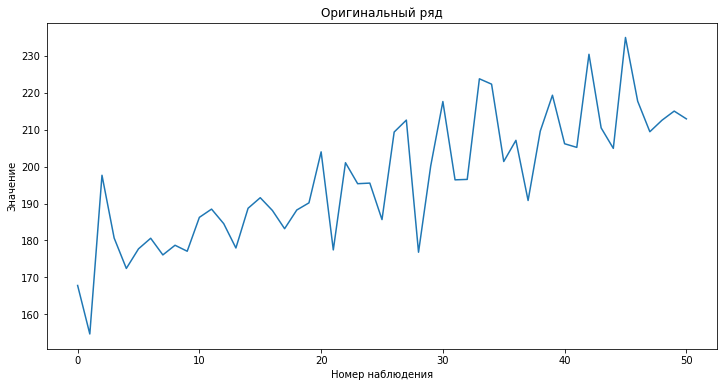

In [ ]:
data_pred = (detrended_data + forecast_arima_list)[-51:]
plt.figure(figsize=(12, 6))
plt.plot(data_pred)
plt.title('Детрендированный ряд')
plt.xlabel('Номер наблюдения')
plt.ylabel('Значение')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot((data + forecast_arima_orig_list)[-51:])
plt.title('Оригинальный ряд')
plt.xlabel('Номер наблюдения')
plt.ylabel('Значение')
plt.show()

Таким образом, можно считать, что модель AR(2) может хорошо прогнозировать текущий временной ряд и выполненные действия позволили получить адекватную модель и корректный прогноз.

